# Flight Price Prediction

Introduction:

In today's dynamic travel landscape, predicting flight prices has become an essential aspect for both travelers seeking cost-effective options and airlines aiming to optimize revenue. The myriad of factors influencing ticket costs, such as seasonality, route popularity, day of the week, and class distinctions, makes flight price prediction a challenging yet valuable endeavor.

In this project, the goal is to leverage data analytics and machine learning techniques to build a robust flight price prediction model. The dataset, likely comprising features like departure and arrival cities, dates, airlines, and possibly more, holds the key to unraveling patterns and trends that contribute to the variability in ticket prices.

Approach:

Data Collection:
Acquire a comprehensive dataset containing historical flight information. This dataset should encompass a diverse range of routes, airlines, and temporal variations to ensure the model captures the complexity of the market.

Exploratory Data Analysis (EDA):
Conduct EDA to gain insights into the distribution of flight prices, identify correlations between features, and uncover any notable patterns. Visualization tools can aid in understanding the data's underlying structure.

Data Preprocessing:
Cleanse and preprocess the data to handle missing values, outliers, and categorical variables. Feature engineering may involve extracting relevant information from timestamps, creating new variables, or encoding categorical data.

Feature Selection:
Choose the most influential features for predicting flight prices. This step involves selecting variables that contribute the most to the model's predictive power while minimizing unnecessary complexity.

Model Selection:
Experiment with various machine learning algorithms suitable for regression tasks. Algorithms like Random Forests, Gradient Boosting, and Support Vector Machines are commonly employed for predicting numerical values.

Model Training:
Split the dataset into training and testing sets to train the selected model. Optimize hyperparameters to enhance the model's performance and ensure its ability to generalize to unseen data.

Evaluation:
Evaluate the model's performance using appropriate metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or others. This step helps gauge how well the model predicts flight prices compared to the actual values.

Deployment:
Once satisfied with the model's accuracy, deploy it for real-time predictions. Users can input relevant details, and the model will output an estimated flight price based on the learned patterns.

By undertaking this project, we aim to provide a valuable tool for travelers and industry stakeholders, enabling them to make informed decisions regarding flight choices and pricing strategies. Through the integration of data analytics and machine learning, we endeavor to bring efficiency and precision to the realm of flight price prediction.

## Research Questions

The aim of our study is to answer the below research questions:
    <br>a) Does price vary with Airlines?
    <br>b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
    <br>c) Does ticket price change based on the departure time and arrival time?
    <br>d) How the price changes with change in Source and Destination?
    <br>e) How does the ticket price vary between Economy and Business class?
    <br>f) How does the price changes with number of stops in the travel?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_flights=pd.read_csv('Flight Details.csv')

In [ ]:
df_flights

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


We can drop the Unnamed: 0 column as it represents the index column.

In [ ]:
df_flights.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_flights.rename(columns={'duration':'duration(in hours)','days_left':'days_left_before_flight_takeoff'},inplace=True)

In [ ]:
df_flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration(in hours),days_left_before_flight_takeoff,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Exploratory Data Analysis

In [ ]:
df_flights.shape

(300153, 11)

In [ ]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   airline                          300153 non-null  object 
 1   flight                           300153 non-null  object 
 2   source_city                      300153 non-null  object 
 3   departure_time                   300153 non-null  object 
 4   stops                            300153 non-null  object 
 5   arrival_time                     300153 non-null  object 
 6   destination_city                 300153 non-null  object 
 7   class                            300153 non-null  object 
 8   duration(in hours)               300153 non-null  float64
 9   days_left_before_flight_takeoff  300153 non-null  int64  
 10  price                            300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


We have 8 categorical features and 3 numerical features. Next step, we find descriptive stats for numerical variables and cardinality or unique values for categorical variables.

In [ ]:
#Checking basic descriptive statistics for numerical variables
df_flights.describe()

,duration(in hours),days_left_before_flight_takeoff,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
#Checking unique values in Categorical variables
categorical_features = [feature for feature in df_flights.columns if df_flights[feature].dtypes == 'object']
for feature in categorical_features:
    print('{} has {} unique values'.format(feature,len(df_flights[feature].unique())))

airline has 6 unique values
flight has 1561 unique values
source_city has 6 unique values
departure_time has 6 unique values
stops has 3 unique values
arrival_time has 6 unique values
destination_city has 6 unique values
class has 2 unique values


In [ ]:
##Checking null values in the dataset
df_flights.isnull().sum()

airline                            0
flight                             0
source_city                        0
departure_time                     0
stops                              0
arrival_time                       0
destination_city                   0
class                              0
duration(in hours)                 0
days_left_before_flight_takeoff    0
price                              0
dtype: int64

Finding what are the unique values in the categorical variables

In [ ]:
##Exploring airline companies
df_flights['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [ ]:
##Exploring Source and Destination cities
print('Source cities are {}'.format(df_flights['source_city'].unique()))
print('Destination cities are {}'.format(df_flights['destination_city'].unique()))

Source cities are ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Destination cities are ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


In [ ]:
##Finding which airline has more booking options to travel comparing to other airlines
df_flights['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

<ipython-input-16-98784d89d531>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Count of flights for each airline')

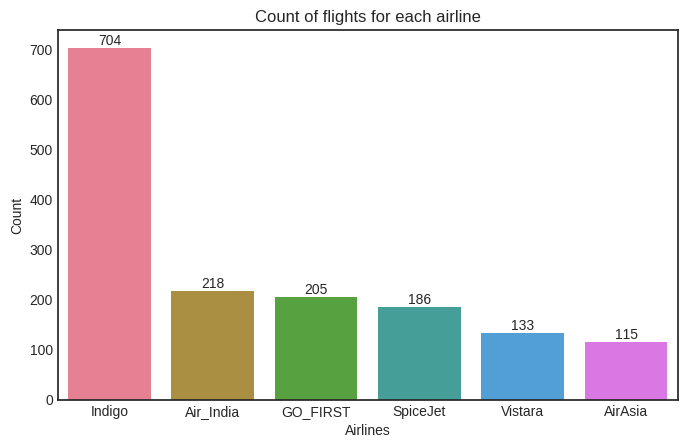

In [ ]:
##Finding which airline has most operating flights
by_airline=df_flights.groupby(['airline','flight'],as_index=False).count()
by_airline['airline'].value_counts()

plt.style.use('seaborn-white')
plt.figure(figsize=(8,4.8))

ax = sns.countplot(x='airline',data=by_airline,palette='husl',order=by_airline['airline'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Airlines')
plt.ylabel('Count')
plt.title('Count of flights for each airline')

From the above bar chart, we can observe that Indigo airlines has most number of flights with count 704, second highest is Air_india with 218 followed by GO_FIRST, SpiceJet, Vistara, AirAsia with their respective number of flights.

<ipython-input-17-01fb4ff5e129>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_flights['price'],color='blue')


<Axes: xlabel='price', ylabel='Density'>

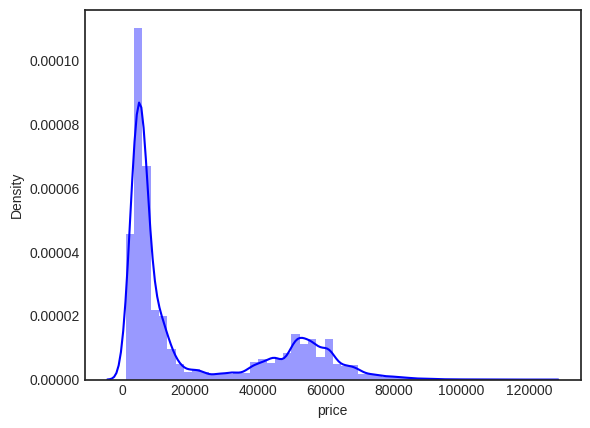

In [ ]:
## Checking the price(target) variable distribution for skewness
sns.distplot(df_flights['price'],color='blue')

From the above graph, we observe that the price(target) variable is right skewed distributed. For machine learning modelling, we make sure that the target varible is uniformly distributed. We will apply transformations later to it.

Lets dive more into EDA of prices how it varies by different categories

<ipython-input-18-948f60dd2c5b>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0.5, 1.0, 'Prices Across Different Airlines')

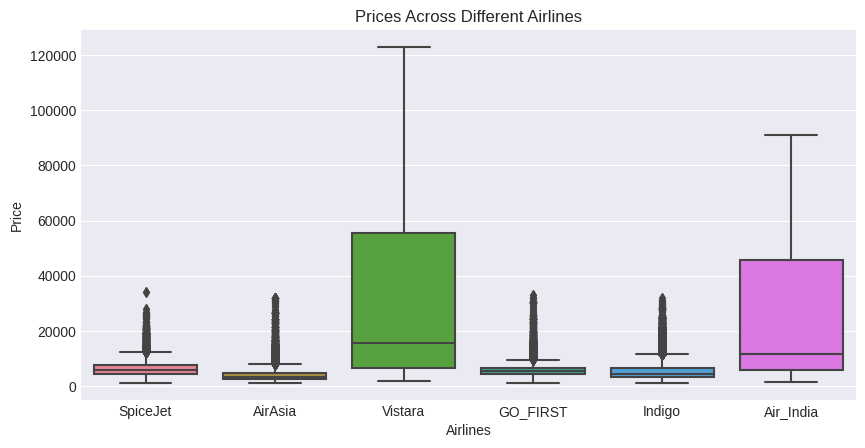

In [ ]:
##Does price vary with Airlines?

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,4.8))
sns.boxplot(x='airline',y='price',data=df_flights,palette='husl')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Prices Across Different Airlines')

We can observe from the above boxplot that ticket prices varies from airlines to airlines. As SpiceJet, AirAsia, GO_FIRST, Indigo have the minimal price difference between them and also contains outliers whereas Vistara and Air_India have the highest and second highest ticket price variations respectively.
From this graph we conclude that Vistara and Air_India tickets are expensive to travel compared to four other airlines.

---



<ipython-input-19-40caf0143db3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


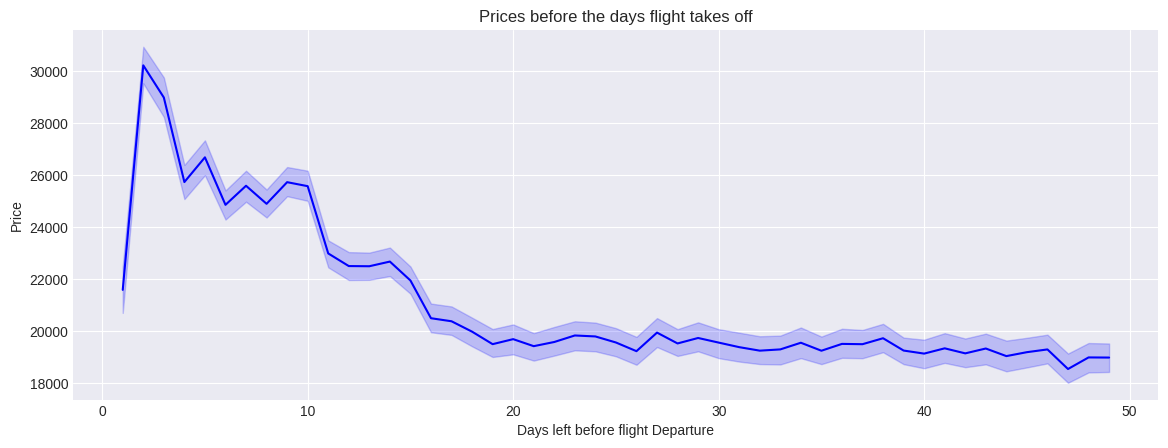

In [ ]:
##How is the price affected when tickets are bought in just 1 or 2 days before departure?

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,4.8))
sns.lineplot(x='days_left_before_flight_takeoff',y='price',data=df_flights,color='blue')
plt.xlabel("Days left before flight Departure")
plt.ylabel("Price")
plt.title("Prices before the days flight takes off")
plt.show()

From the time series line chart, we can say that prices are very high when the flight depature date approaches. This states the prices will be cheaper when booked in advance like 30 days or more prior to travel date and will be higher from 10 days before. We can also see that prices cut down at 1-day before or at the same travel day, it can be due to last minute vacant seats in the flight, so airlines reduce the prices to fillup those seats instead of unfilled.

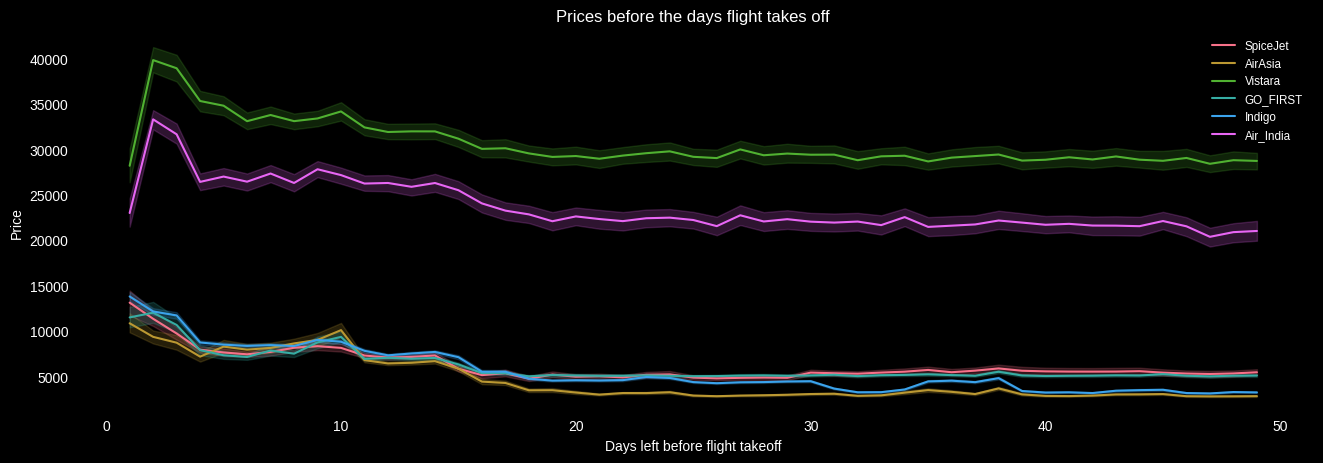

In [ ]:
## Prices before the days for flight departure across airlines

plt.style.use('dark_background')
plt.figure(figsize=(16,5))
sns.lineplot(x='days_left_before_flight_takeoff',y='price',data=df_flights,palette='husl',hue='airline')
plt.xlabel("Days left before flight takeoff")
plt.ylabel("Price")
plt.title("Prices before the days flight takes off")
plt.legend(loc='upper right',fontsize='small')
plt.grid(False)
plt.show()

This time for each airlines of the time series line chart, Vistara and Air_India tickets are expensive before days of depature date when compared to rest of the other airlines.

In [ ]:
df_flights.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration(in hours)',
       'days_left_before_flight_takeoff', 'price'],
      dtype='object')

<ipython-input-22-27827d7d5b06>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0.5, 1.0, 'Price for various Arrival times')

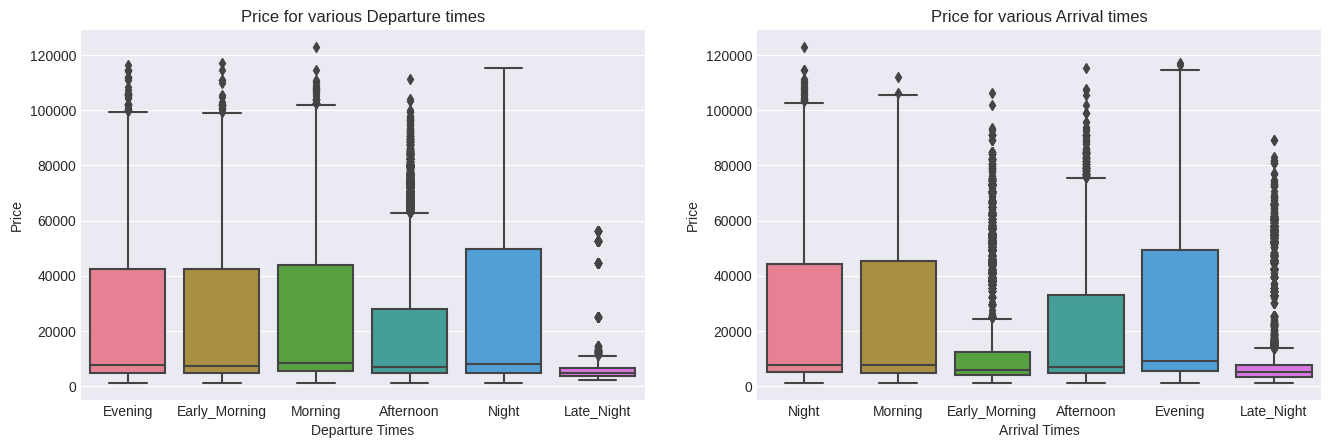

In [ ]:
## Does ticket price change based on the departure time and arrival time?

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,4.8))
plt.subplot(1,2,1)


sns.boxplot(x='departure_time',y='price',data=df_flights,palette='husl')
plt.xlabel('Departure Times')
plt.ylabel('Price')
plt.title('Price for various Departure times')


plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df_flights,palette='husl')
plt.xlabel('Arrival Times')
plt.ylabel('Price')
plt.title('Price for various Arrival times')

By comparing the boxplots of departure and arrival times, we can observe that the prices for Late_Night times are lowest among the other times. In the Departure times plot, Night time tickets are the highest whereas in arrival times plot, Evening time tickets are highest compared to other times with their respective plots.

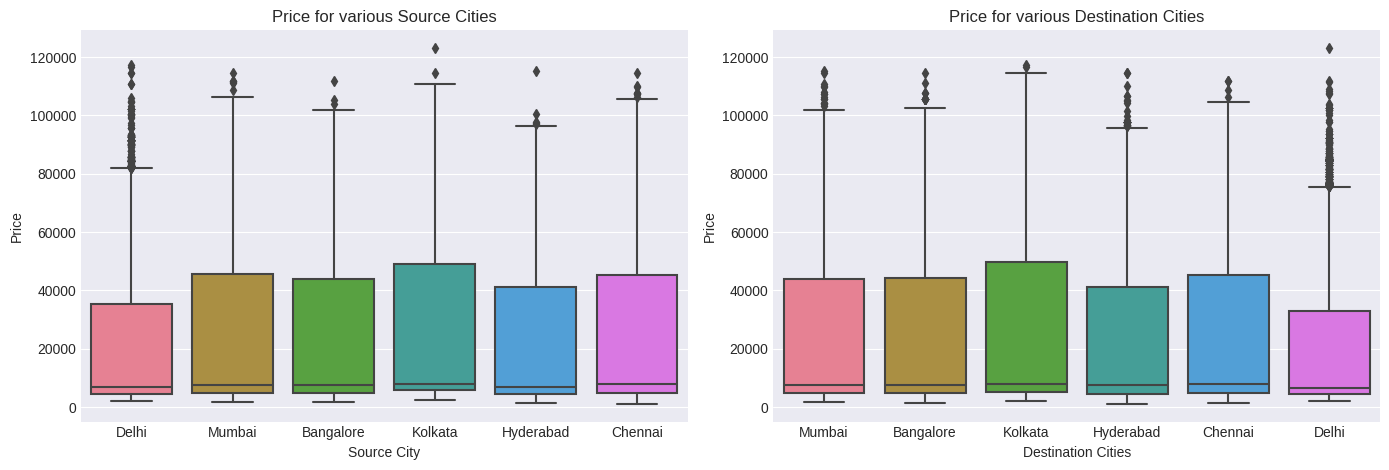

In [ ]:
## How the price changes with change in Source and Destination?
plt.figure(figsize=(14,4.8))

plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df_flights,palette='husl')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.title('Price for various Source Cities')

plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df_flights,palette='husl')
plt.xlabel('Destination Cities')
plt.ylabel('Price')
plt.title('Price for various Destination Cities')
plt.tight_layout()

By comparing the boxplots of Source and Destination cities, we can observe that the prices are almost similar to each other. In both the plots, Kolkata city is a little higher than other cities whereas Delhi city is the lowest. Rest all other cities are having similar or near to same price range.

Text(0.5, 1.0, 'Count of booking options for each class')

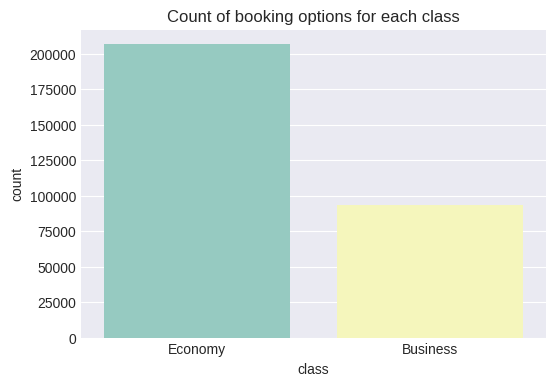

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='class',data=df_flights)
plt.title('Count of booking options for each class')

Generally, in any flight there will be more economy class seats than business class seats. So in the above graph, we see that the number of economy class booking options are more than the business class.

Text(0.5, 1.0, 'Prices Across Different Class')

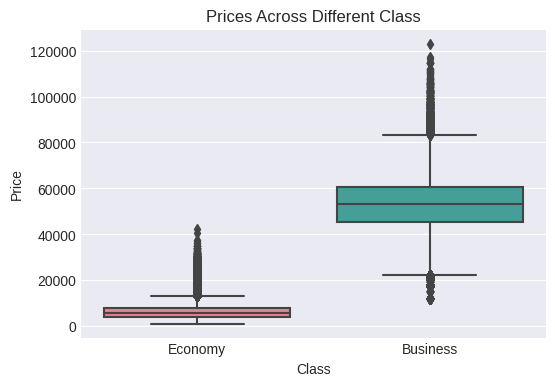

In [ ]:
## How does the ticket price vary between Economy and Business class?
plt.figure(figsize=(6,4))
sns.boxplot(x='class',y='price',data=df_flights,palette='husl')
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Prices Across Different Class')

It is obvious that business class tickets are more expensive than economy class because of its amenties, extra legroom and comfortable seats, food and beverage services and many more features. So this is the reason business class are expensive.

Text(0, 0.5, 'Price')

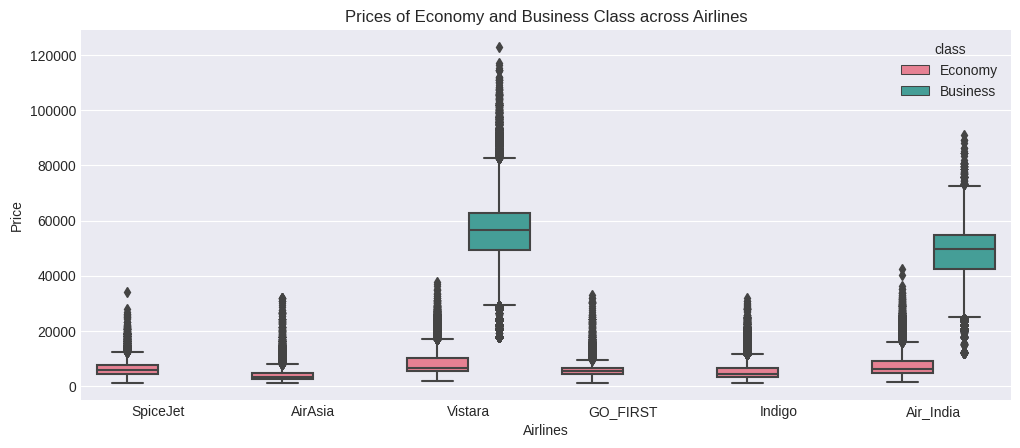

In [ ]:
## How are the prices of economy and business class across airlines
plt.figure(figsize=(12,4.8))

sns.boxplot(x='airline',y='price',hue='class',data=df_flights,palette='husl')

plt.title('Prices of Economy and Business Class across Airlines')
plt.xlabel('Airlines')
plt.ylabel('Price')

Vistara and Air_India are the only two airlines, having the both business and economy class whereas the other having only economy class. Comparing the business class category, Vistara tickets are higher than the other.

<Axes: xlabel='stops', ylabel='count'>

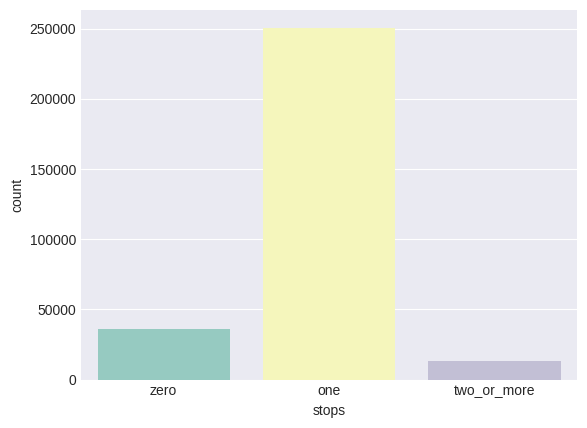

In [ ]:
## How does the price changes with number of stops in the travel?

sns.countplot(x='stops',data=df_flights)

Most of the flight journeys have one stop. Second is direct flight journey with zero stops followed by two or more stop in the journey.

<Axes: xlabel='stops', ylabel='price'>

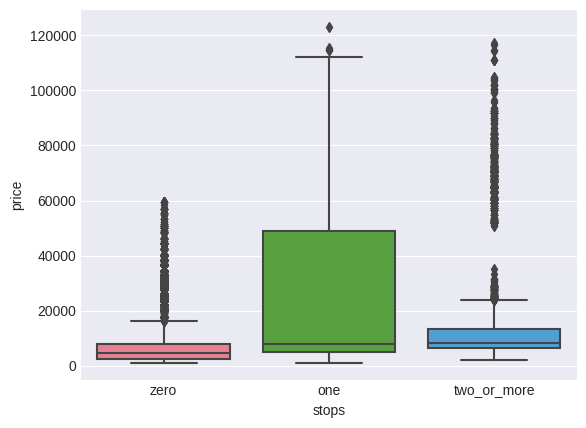

In [ ]:
sns.boxplot(x='stops',y='price',data=df_flights,palette='husl')

As there are more flights with one stop, the price variation is also high for the one stop flights. Whereas two or more stops is the second highest in terms of price and to my surprise, non-stop flights are cheaper.

In [ ]:
## Checking which airline routes have the most number of flights
df_cities=df_flights.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count()
df_cities.groupby(['source_city','destination_city'],as_index=False)['flight'].count().sort_values(by='flight',ascending=False).head(10)

,source_city,destination_city,flight
14,Delhi,Mumbai,364
10,Delhi,Bangalore,310
13,Delhi,Kolkata,306
27,Mumbai,Delhi,282
11,Delhi,Chennai,258
29,Mumbai,Kolkata,240
25,Mumbai,Bangalore,228
1,Bangalore,Delhi,227
12,Delhi,Hyderabad,224
22,Kolkata,Delhi,185


From the above table, we can observe that from Delhi to Mumbai is having most number flights with 364, followed by Delhi to Bangalore and Delhi to Kolkata with slightly difference of 310 and 306 respectively. Delhi is the most populas source city having more number of flights.

In [ ]:
## Checking the average ticket prices from source city to destination city
df_flights.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().sort_values(by='price',ascending=False).head(10)

,airline,source_city,destination_city,price
150,Vistara,Bangalore,Kolkata,35746.714874
160,Vistara,Delhi,Kolkata,35702.441732
176,Vistara,Mumbai,Kolkata,35223.862417
172,Vistara,Mumbai,Bangalore,35029.880315
151,Vistara,Bangalore,Mumbai,34961.383271
169,Vistara,Kolkata,Delhi,33792.181332
167,Vistara,Kolkata,Bangalore,33501.412807
171,Vistara,Kolkata,Mumbai,33416.101911
156,Vistara,Chennai,Mumbai,32662.127337
173,Vistara,Mumbai,Chennai,32181.946251


We have taken consideration of both the business and economy class into it and displaying the top 10 average prices from source city to destination city. We see that top are Vistara because of the highly priced business class tickets and outliers, so it resulting into skewness of the mean prices. Interesting point is Kolkate city is appeared 6 times most than other cities.
So we consider median as measure of central tendency to elimate it.

In [ ]:
## Checking the median tickets prices
df_flights.groupby(['airline','source_city','destination_city'],as_index=False)['price'].median().sort_values(by='price',ascending=False).head(10)

,airline,source_city,destination_city,price
150,Vistara,Bangalore,Kolkata,51817.0
148,Vistara,Bangalore,Delhi,32923.0
176,Vistara,Mumbai,Kolkata,22900.5
174,Vistara,Mumbai,Delhi,22140.0
161,Vistara,Delhi,Mumbai,21718.5
151,Vistara,Bangalore,Mumbai,20760.0
172,Vistara,Mumbai,Bangalore,20684.0
160,Vistara,Delhi,Kolkata,18975.0
157,Vistara,Delhi,Bangalore,17873.0
44,Air_India,Delhi,Mumbai,17295.0


We can observe the change in the ticket prices which is lower than the above table and not a surprise that vistara again dominating the table with 9 entries due to off its business class tickets inclusion as well.

<ipython-input-40-f35fdbfb7c10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_flights.corr(),annot=True)


<Axes: >

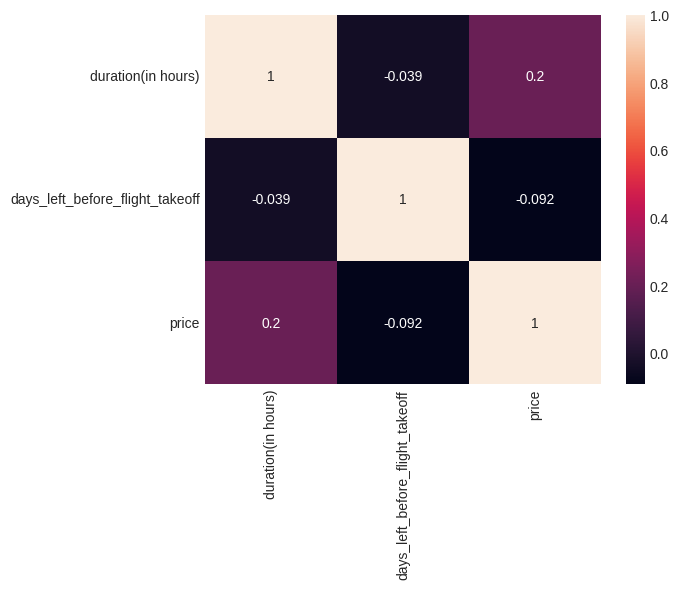

In [ ]:
sns.heatmap(df_flights.corr(),annot=True)

From the above heatmap, we can observe that the numerical variables 'duration' and 'days_left_before_flight_takeoff' are slightly and negatively correlated to target variable  'price'. It concludes that the target variable price is not highly affected by those two variables.


## Exploratory Data Analysis Summary

After exploring the flight prices dataset, we have discovered hidden patterns, trends, how the variables are effecting the price, how are the independent variables are coorelated to dependent variables.
The following are the summary points after analyzing the flights data.

1. Vistara has the most number of booking options available to travel followed by Air_India because these two airlines accomodating both economy and business class tickets for passengers.
2. The most number of flights are owned by Indigo with 704 which is 3 times higher than rest of its competitors.
3. Majority of the ticket prices are in the range of 1500 to 20,000. Some of the ticket prices are exceeding above 30k, 40k to the extreme of 60k, 70k range because of the business class.
4. Vistara and Air_India airlines ticket prices are expensive to travel compare to other airlines.
5. Tickets are booked 30 days prior to travel date are least expensive and the prices start climbing before the 10 days of the journey date.
6. Both the arrival and departure in Night time journey flights are slightly expensive and late nights journey are the cheapest.
7. As mentioned earlier, travelling to or from Kolkate city is expensive than other airline routes.
8. Obviously, the business class tickets are higher than economy class because of its amenties provided by the flight crew to its passengers.
9. One stop flights are the most popular traveling options and has high price variations.
10. The numerical variables are less effective on the target variable Price.


## Future Outcomes

1. Will be exploring more into the data by taking considerations of only economy class tickets in all the airlines.
2. Preprocessing the data by converting the categorical variables into numrical variables.
3. Performing various techniques to handle the outliers asscoaited with.
4. Checking the multi-collinearity of the independent variables.
5. Selecting the prominent features for the Machine Learning modelling.
6. Implement various ML algorithms and calcualting the scores.
7. Comparing the scores and selecting the best performing model.